Initializing packages

In [5]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams["axes.labelsize"] = 15


from pandas import Series, DataFrame
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

Populating the interactive namespace from numpy and matplotlib


Reading the telco churn dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

Computing summary statistics on the dataset

In [3]:
df.shape

(7043, 21)

In [4]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [0]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [0]:
df.isnull().sum()/len(df)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [0]:
df.dropna(inplace = True)

In [0]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the summary statistics, we observe the following:
1. There are 7043 rows and 21 columns
2. Rows with missing values in the Total Charges column were removed
3. Apart from senior citizen, tenure and monthly charges, all other columns seem to be categorical variables

Skipped exploratory data analysis since Prathik has already done that part

Data preparation:
1. Split the data into X and Y 
2. Create a validation/holdout dataset
3. Use one hot encoding for the categorical variables and min max scaling for the numeric variables (since we are considering a distance based classifier like KNN)
4. Encode Y variable such that 'Yes'=1 and 'No'=0

In [0]:
mask=df['Churn']=='Yes'
df.loc[mask,'Churn']=1

In [0]:
df.loc[~mask,'Churn']=0

In [0]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [0]:
X=df.drop(['customerID','Churn'],axis=1)
Y=df['Churn'].astype(int)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y)

In [0]:
numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [0]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [0]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Model building

Since it is a classification problem, below are the models I am trying out:
1. Logistic regression
2. KNN Classifier
3. Decision Tree Classifier
4. Random Forest Classifier

In [0]:
#Logistic Regression


lr = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])



grid={"classifier__C":np.logspace(-3,3,7), "classifier__penalty":["l1","l2"]}

lr_gs = GridSearchCV(lr, param_grid=grid,cv=5,scoring='recall')
lr_gs.fit(X_train, Y_train)
print(lr_gs.best_params_)




Y_pred_lr=lr_gs.predict(X_test)
Y_predlr_=lr_gs.predict(X_train)

print('Misclassified samples for logistic regression: %d' %(Y_test != Y_pred_lr).sum())
print('Accuracy for logistic regression in test data: %.2f' % accuracy_score(Y_test,Y_pred_lr))
print('Accuracy for logistic regression in training data: %.2f' % accuracy_score(Y_train,Y_predlr_)) 



{'classifier__C': 1000.0, 'classifier__penalty': 'l2'}
Misclassified samples for logistic regression: 277
Accuracy for logistic regression in test data: 0.80
Accuracy for logistic regression in training data: 0.81


Logistic: ROC AUC=0.846
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1033
           1       0.64      0.59      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



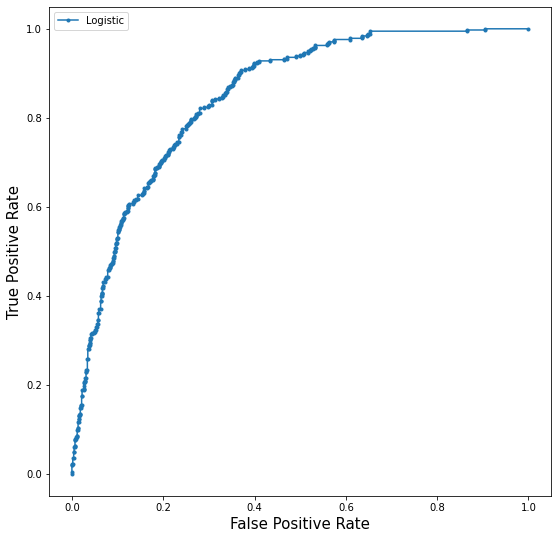

Logistic: f1=0.614 auc=0.634


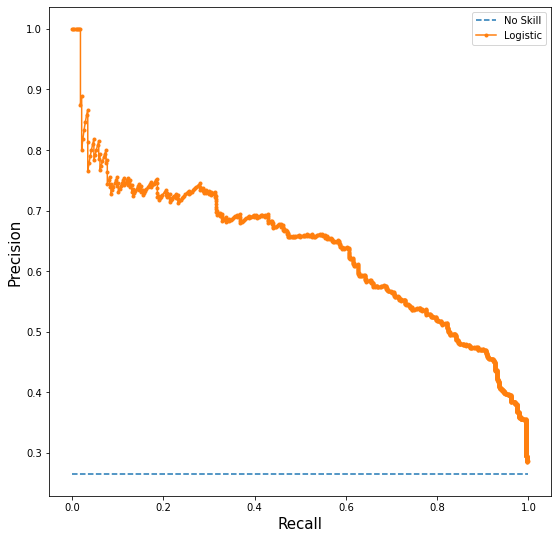

[[910 123]
 [154 220]]


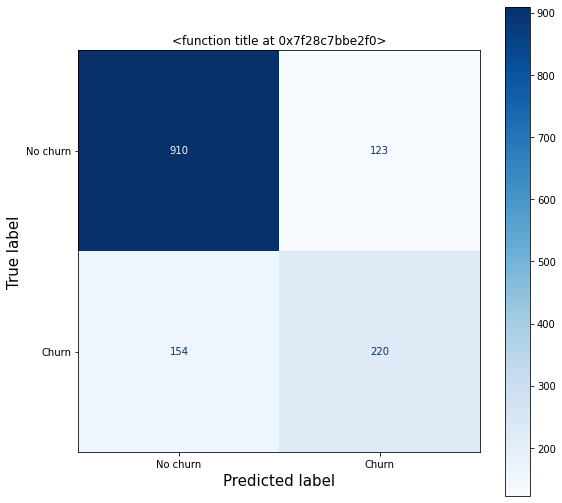

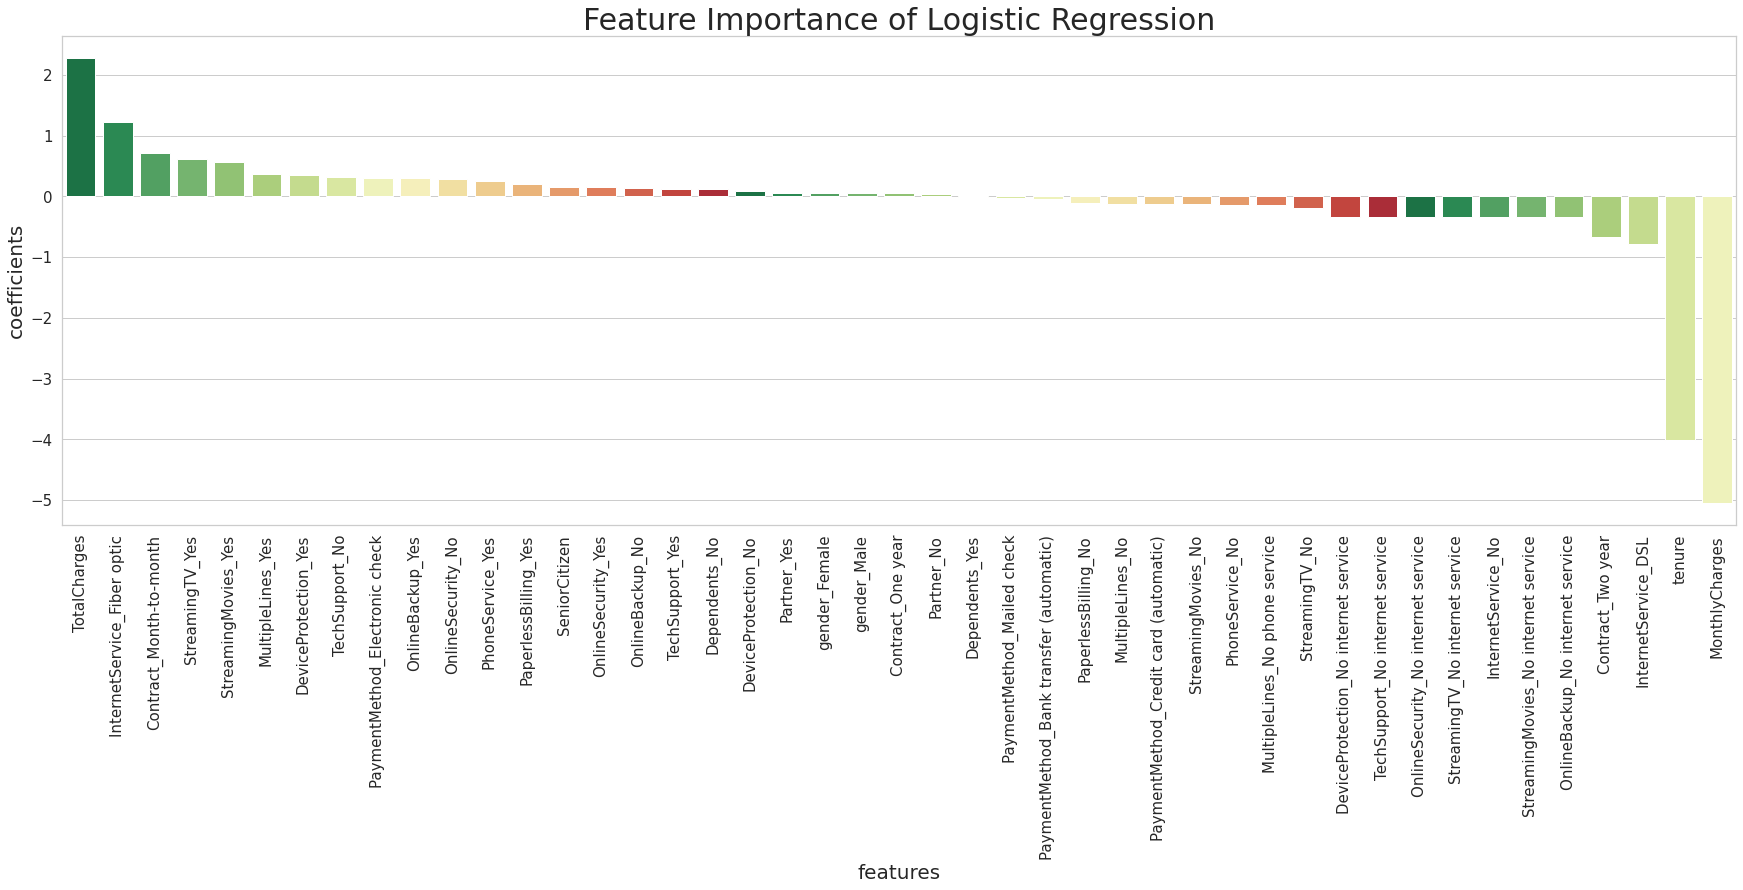

In [0]:


probs = lr_gs.predict_proba(X_test)
yhat = lr_gs.predict(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc_s = roc_auc_score(Y_test, probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (auc_s))
# calculate roc curves
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15

print(classification_report(Y_test, Y_pred_lr))



fpr, tpr, _ = roc_curve(Y_test, probs)

pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15

lr_probs = lr_gs.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = lr_gs.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(Y_test, lr_probs)
lr_f1, lr_auc = f1_score(Y_test,yhat ), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

class_names=['No churn','Churn']

disp = plot_confusion_matrix(lr_gs, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,normalize=None, values_format = '.0f'
                                 )
disp.ax_.set_title(title)

print(disp.confusion_matrix)

plt.show()

coefficients  = pd.DataFrame(lr_gs.best_estimator_.named_steps["classifier"].coef_.ravel())
column_df1     = pd.DataFrame(lr_gs.best_estimator_.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features))
column_df2     = pd.DataFrame(list(numeric_features))

frames = [column_df2,column_df1]

column_df = pd.concat(frames).reset_index(drop=True)



coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 9]
plt.rcParams["axes.labelsize"] = 15
import seaborn as sns

sns.set(style="whitegrid")

#Total_sales = df.groupby(['Company'])['Unit Sales'].sum().sort_values(ascending=False).reset_index()

ax = sns.barplot(x="features", y="coefficients", data=coef_sumry,palette=sns.color_palette("RdYlGn_r", 18))

plt.xlabel('features', fontsize=20)
plt.ylabel('coefficients', fontsize=20)
plt.xticks(rotation=90)

ax.axes.set_title("Feature Importance of Logistic Regression",fontsize=30)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)


In [0]:
	coefficients	features
3	2.272688	TotalCharges
16	1.216800	InternetService_Fiber optic
36	0.722255	Contract_Month-to-month
32	0.622111	StreamingTV_Yes
35	0.561946	StreamingMovies_Yes
14	0.373173	MultipleLines_Yes
26	0.348145	DeviceProtection_Yes
27	0.316160	TechSupport_No
43	0.300224	PaymentMethod_Electronic check
23	0.297829	OnlineBackup_Yes
18	0.287497	OnlineSecurity_No
11	0.251701	PhoneService_Yes
40	0.207294	PaperlessBilling_Yes
0	0.160914	SeniorCitizen
20	0.147158	OnlineSecurity_Yes
21	0.136826	OnlineBackup_No
29	0.118495	TechSupport_Yes
8	0.114919	Dependents_No
24	0.086510	DeviceProtection_No
7	0.056975	Partner_Yes
4	0.051650	gender_Female
5	0.051611	gender_Male
37	0.050885	Contract_One year
6	0.046287	Partner_No
9	-0.011657	Dependents_Yes
44	-0.034217	PaymentMethod_Mailed check
41	-0.035494	PaymentMethod_Bank transfer (automatic)
39	-0.104032	PaperlessBilling_No
12	-0.121473	MultipleLines_No
42	-0.127250	PaymentMethod_Credit card (automatic)
33	-0.127292	StreamingMovies_No
10	-0.148439	PhoneService_No
13	-0.148439	MultipleLines_No phone service
30	-0.187456	StreamingTV_No
25	-0.331393	DeviceProtection_No internet service
28	-0.331393	TechSupport_No internet service
19	-0.331393	OnlineSecurity_No internet service
31	-0.331393	StreamingTV_No internet service
17	-0.331393	InternetService_No
34	-0.331393	StreamingMovies_No internet service
22	-0.331393	OnlineBackup_No internet service
38	-0.669878	Contract_Two year
15	-0.782145	InternetService_DSL
1	-4.000646	tenure
2	-5.045992	MonthlyCharges

,coefficients,features
3,2.272688,TotalCharges
16,1.216800,InternetService_Fiber optic
36,0.722255,Contract_Month-to-month
32,0.622111,StreamingTV_Yes
35,0.561946,StreamingMovies_Yes
14,0.373173,MultipleLines_Yes
26,0.348145,DeviceProtection_Yes
27,0.316160,TechSupport_No
43,0.300224,PaymentMethod_Electronic check
23,0.297829,OnlineBackup_Yes


In [0]:
#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LinearDiscriminantAnalysis())])

lda.fit(X_train, Y_train)

Y_pred_lda=lda.predict(X_test)
Y_predlda_=lda.predict(X_train)

print('Misclassified samples for LDA: %d' %(Y_test != Y_pred_lda).sum())
print('Accuracy for LDA in test data: %.2f' % accuracy_score(Y_test,Y_pred_lda))
print('Accuracy for LDA in training data: %.2f' % accuracy_score(Y_train,Y_predlda_)) 

print(classification_report(Y_test, Y_pred_lda))

Misclassified samples for LDA: 305
Accuracy for LDA in test data: 0.78
Accuracy for LDA in training data: 0.80
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



LDA: ROC AUC=0.827


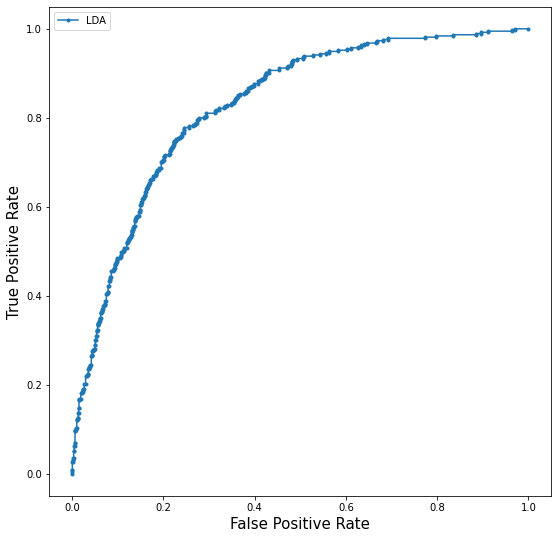

LDA: f1=0.560 auc=0.616


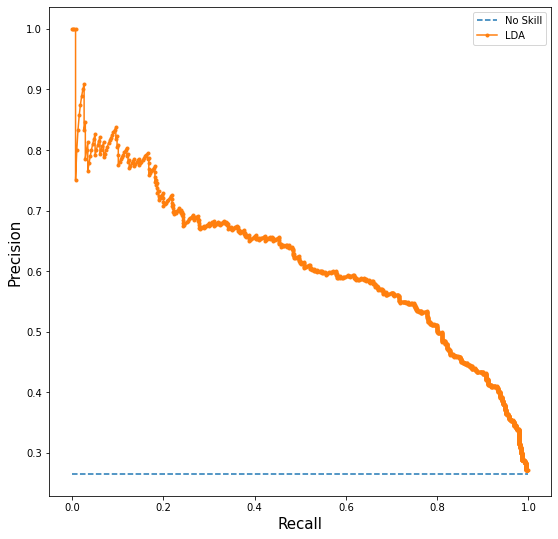

[[908 125]
 [180 194]]


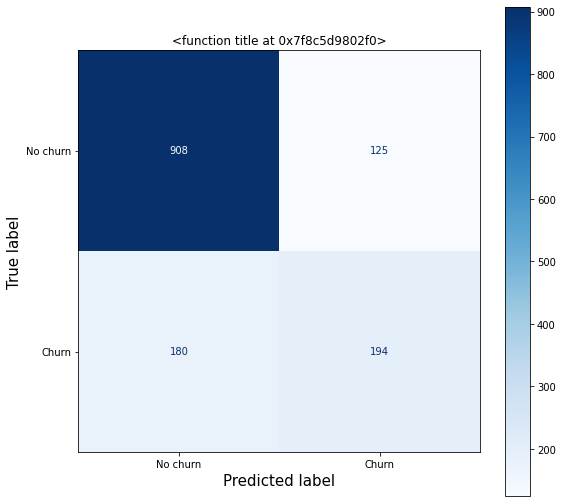

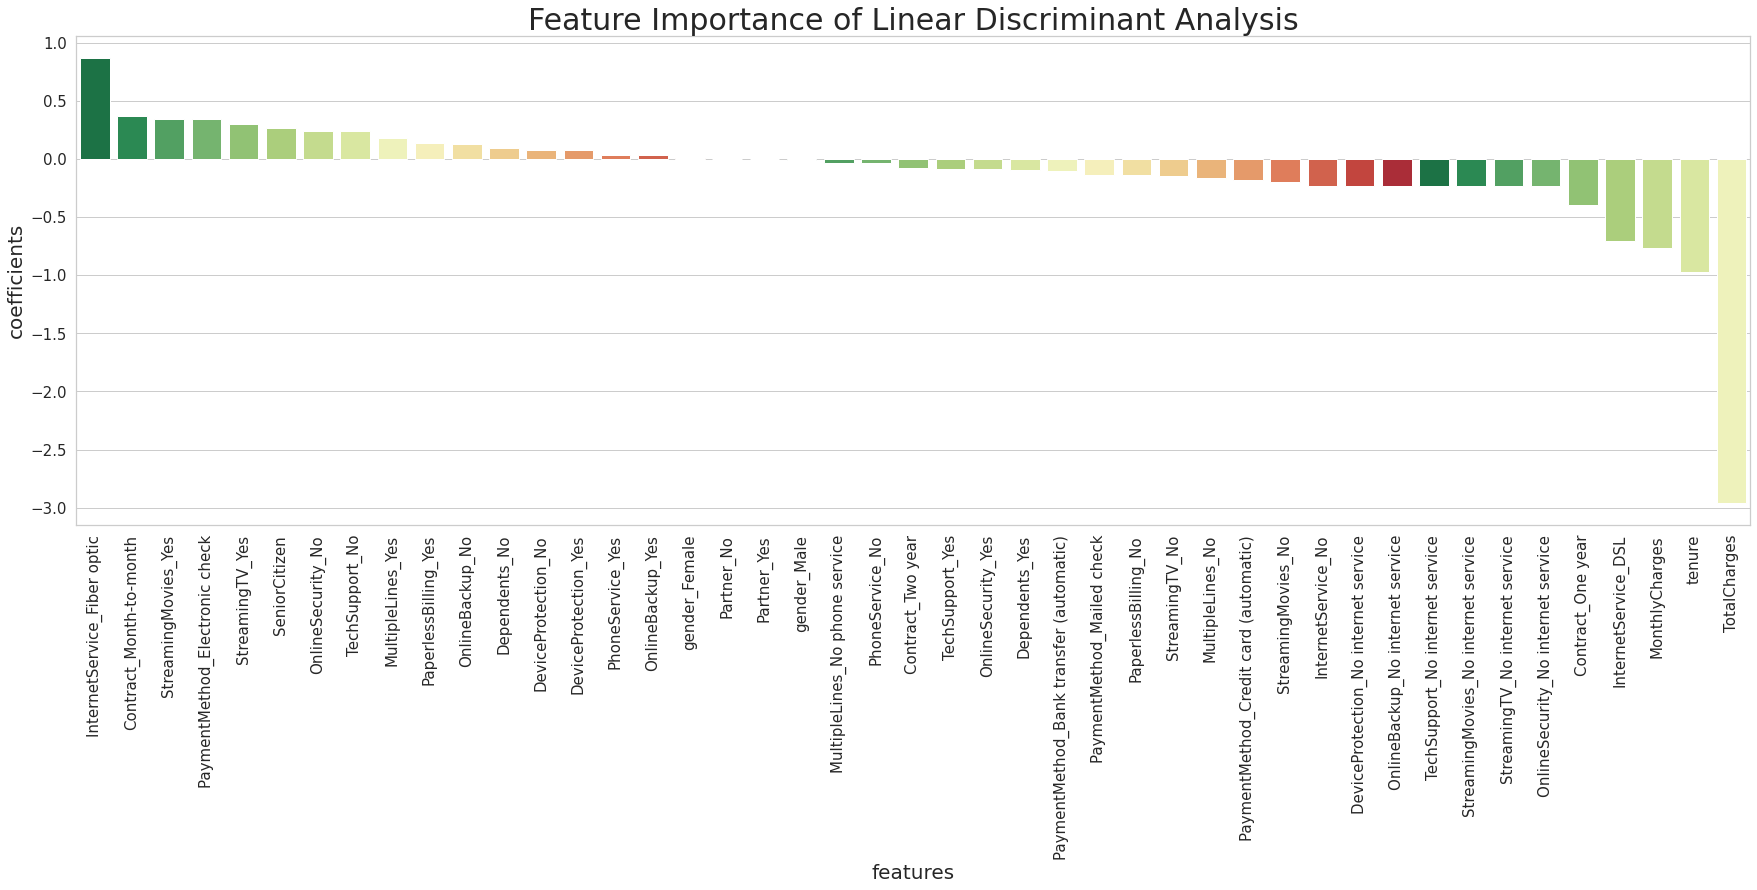

In [0]:
probs = lda.predict_proba(X_test)
yhat = lda.predict(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc_s = roc_auc_score(Y_test, probs)
# summarize scores
print('LDA: ROC AUC=%.3f' % (auc_s))
# calculate roc curves
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15


fpr, tpr, _ = roc_curve(Y_test, probs)

pyplot.plot(fpr, tpr, marker='.', label='LDA')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15

lda_probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_probs = lda_probs[:, 1]
# predict class values
yhat = lda.predict(X_test)
lda_precision, lda_recall, _ = precision_recall_curve(Y_test, lda_probs)
lda_f1, lda_auc = f1_score(Y_test,yhat ), auc(lda_recall, lda_precision)
# summarize scores
print('LDA: f1=%.3f auc=%.3f' % (lda_f1, lda_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lda_recall, lda_precision, marker='.', label='LDA')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

class_names=['No churn','Churn']

disp = plot_confusion_matrix(lda, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,normalize=None, values_format = '.0f'
                                 )
disp.ax_.set_title(title)

print(disp.confusion_matrix)

plt.show()

coefficients  = pd.DataFrame(lda.named_steps["classifier"].coef_.ravel())
column_df1     = pd.DataFrame(lda.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features))
column_df2     = pd.DataFrame(list(numeric_features))

frames = [column_df2,column_df1]

column_df = pd.concat(frames).reset_index(drop=True)



coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 9]
plt.rcParams["axes.labelsize"] = 15
import seaborn as sns

sns.set(style="whitegrid")

#Total_sales = df.groupby(['Company'])['Unit Sales'].sum().sort_values(ascending=False).reset_index()

ax = sns.barplot(x="features", y="coefficients", data=coef_sumry,palette=sns.color_palette("RdYlGn_r", 18))

plt.xlabel('features', fontsize=20)
plt.ylabel('coefficients', fontsize=20)
plt.xticks(rotation=90)

ax.axes.set_title("Feature Importance of Linear Discriminant Analysis",fontsize=30)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)


In [0]:
#Random forest classifier using Grid Search CV
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier())])

params = { 
    'classifier__n_estimators': [100,150,200,250,270],
    'classifier__max_depth' : [4,6,8,10],
    'classifier__max_features' : [8,10,12,15]
    
}
rf_gs = GridSearchCV(rf, param_grid=params,cv=5,scoring='recall')
rf_gs.fit(X_train, Y_train)
print(rf_gs.best_params_)
#print(abs(rf_gs.best_score_))
Y_pred_rf=rf_gs.predict(X_test)
Y_predrf_=rf_gs.predict(X_train)

print('Misclassified samples for Random Forest regression: %d' %(Y_test != Y_pred_rf).sum())
print('Accuracy for Random Forest regression in test data: %.2f' % accuracy_score(Y_test,Y_pred_rf))
print('Accuracy for Random Forest regression in training data: %.2f' % accuracy_score(Y_train,Y_predrf_)) 
print(classification_report(Y_test, Y_pred_rf))





{'classifier__max_depth': 10, 'classifier__max_features': 15, 'classifier__n_estimators': 150}
Misclassified samples for Random Forest regression: 279
Accuracy for Random Forest regression in test data: 0.80
Accuracy for Random Forest regression in training data: 0.90
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



{'classifier__max_depth': 10, 'classifier__max_features': 15, 'classifier__n_estimators': 150}
Misclassified samples for logistic regression: 279
Accuracy for logistic regression in test data: 0.80
Accuracy for logistic regression in training data: 0.90
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Logistic: ROC AUC=0.840


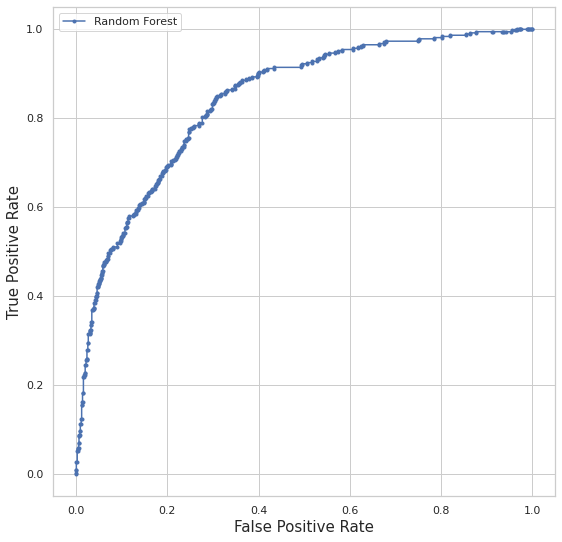

Random Forest: f1=0.582 auc=0.658


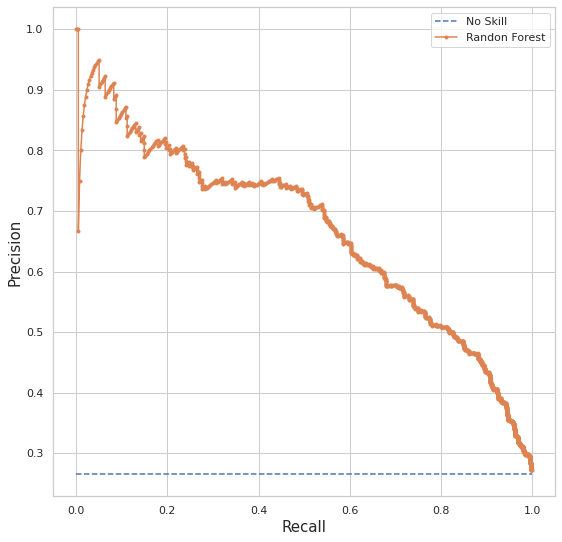

[[934  99]
 [180 194]]


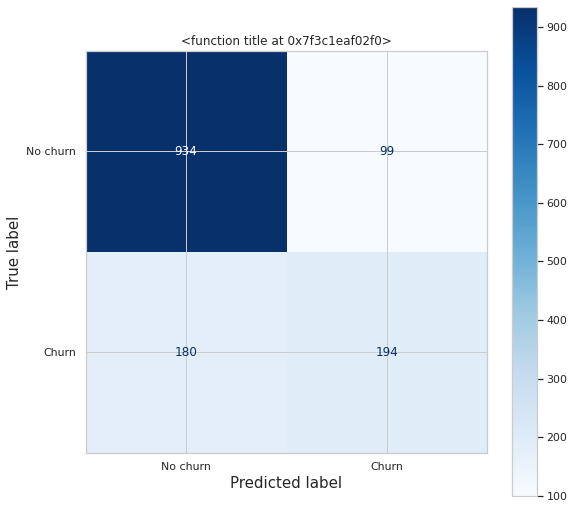

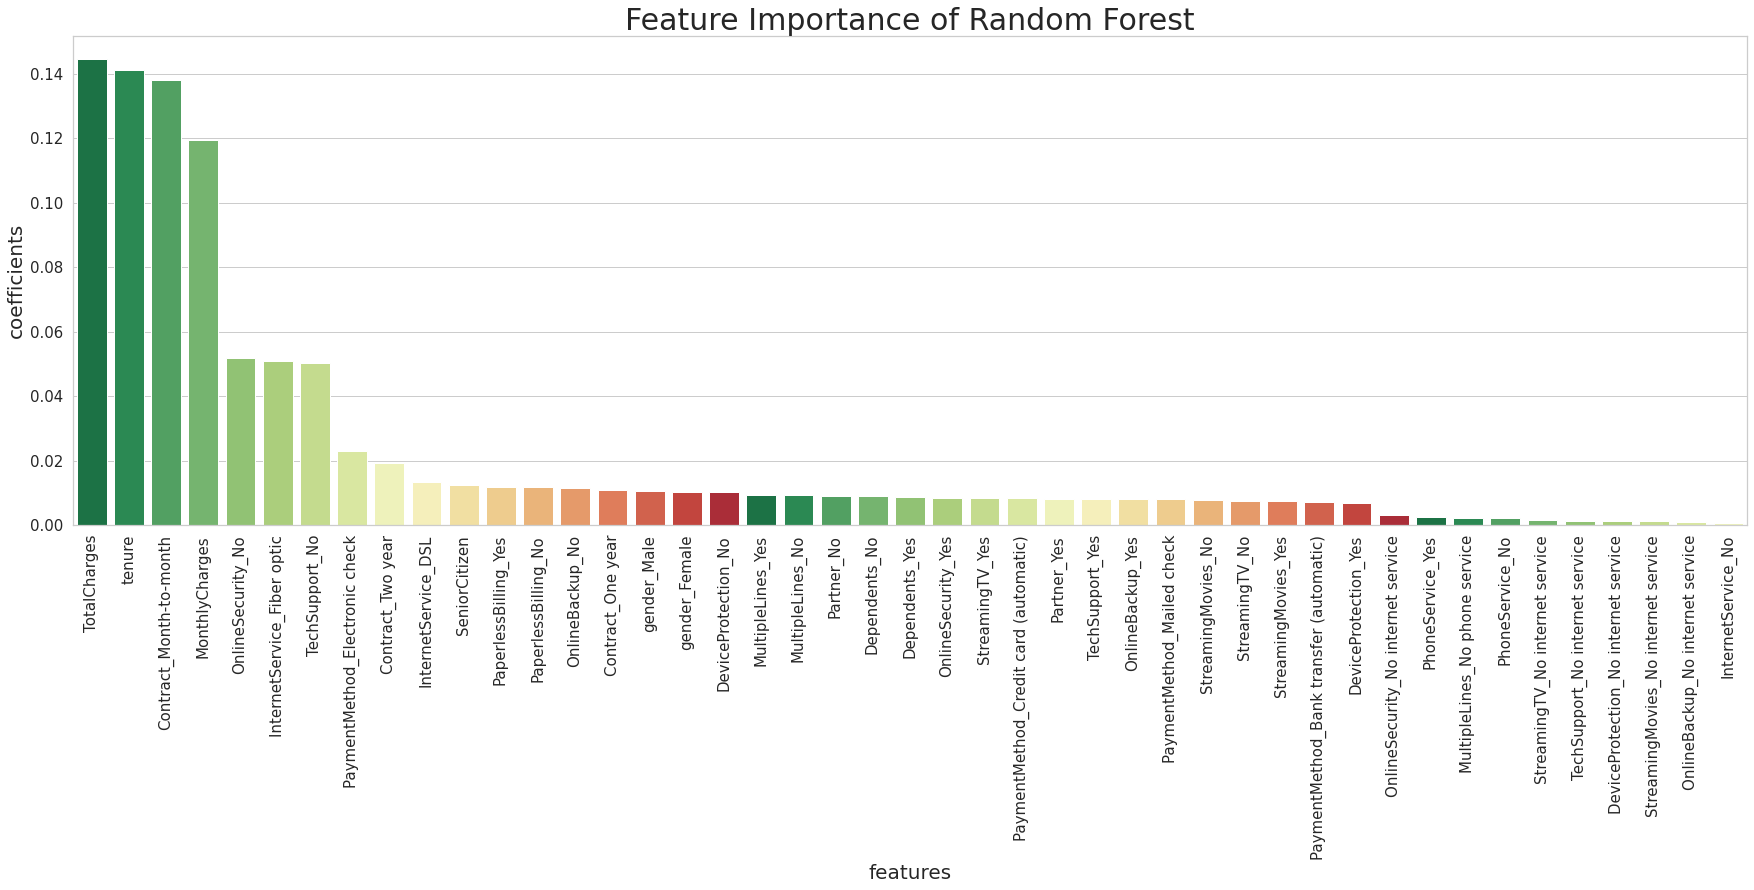

In [0]:
print(rf_gs.best_params_)


print('Misclassified samples for logistic regression: %d' %(Y_test != Y_pred_rf).sum())
print('Accuracy for logistic regression in test data: %.2f' % accuracy_score(Y_test,Y_pred_rf))
print('Accuracy for logistic regression in training data: %.2f' % accuracy_score(Y_train,Y_predrf_)) 
print(classification_report(Y_test, Y_pred_rf))




probs = rf_gs.predict_proba(X_test)
yhat = rf_gs.predict(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc_s = roc_auc_score(Y_test, probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (auc_s))
# calculate roc curves
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15



fpr, tpr, _ = roc_curve(Y_test, probs)

pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15


# keep probabilities for the positive outcome only

# predict class values

rf_precision, rf_recall, _ = precision_recall_curve(Y_test, probs)
rf_f1, rf_auc = f1_score(Y_test,yhat ), auc(rf_recall, rf_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Randon Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



disp = plot_confusion_matrix(rf_gs, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,normalize=None, values_format = '.0f'
                                 )
disp.ax_.set_title(title)

print(disp.confusion_matrix)

plt.show()



coefficients  = pd.DataFrame(rf_gs.best_estimator_.named_steps["classifier"].feature_importances_)
column_df1     = pd.DataFrame(rf_gs.best_estimator_.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features))
column_df2     = pd.DataFrame(list(numeric_features))

frames = [column_df2,column_df1]

column_df = pd.concat(frames).reset_index(drop=True)



coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)



%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 9]
plt.rcParams["axes.labelsize"] = 15
import seaborn as sns

sns.set(style="whitegrid")

#Total_sales = df.groupby(['Company'])['Unit Sales'].sum().sort_values(ascending=False).reset_index()

ax = sns.barplot(x="features", y="coefficients", data=coef_sumry,palette=sns.color_palette("RdYlGn_r", 18))

plt.xlabel('features', fontsize=20)
plt.ylabel('coefficients', fontsize=20)
plt.xticks(rotation=90)

ax.axes.set_title("Feature Importance of Random Forest",fontsize=30)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)


Model evaluation on test data

In [0]:
final_knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])

params = {'classifier__n_neighbors': [20,50,100,150,200]}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(final_knn, param_grid=params, cv=5,scoring='recall')
#fit model to data

knn_gscv.fit(X_train, Y_train)

print(knn_gscv.best_params_)
Y_pred2=knn_gscv.predict(X_test)
Y_pred2_=knn_gscv.predict(X_train)
print('Misclassified samples for KNN: %d' %(Y_test != Y_pred2).sum())
print('Accuracy for KNN in test data: %.2f' % accuracy_score(Y_test,Y_pred2))
print('Accuracy for KNN in training data: %.2f' % accuracy_score(Y_train,Y_pred2_))

print(classification_report(Y_test, Y_pred2))

{'classifier__n_neighbors': 100}
Misclassified samples for KNN: 292
Accuracy for KNN in test data: 0.79
Accuracy for KNN in training data: 0.80
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1033
           1       0.62      0.58      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



KNN: ROC AUC=0.820


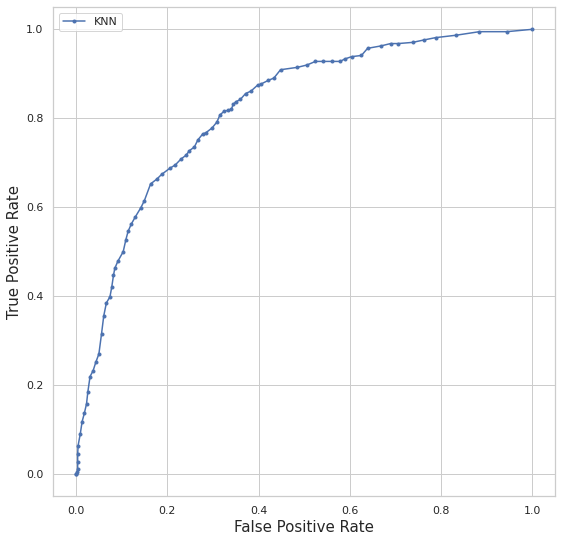

Random Forest: f1=0.597 auc=0.597


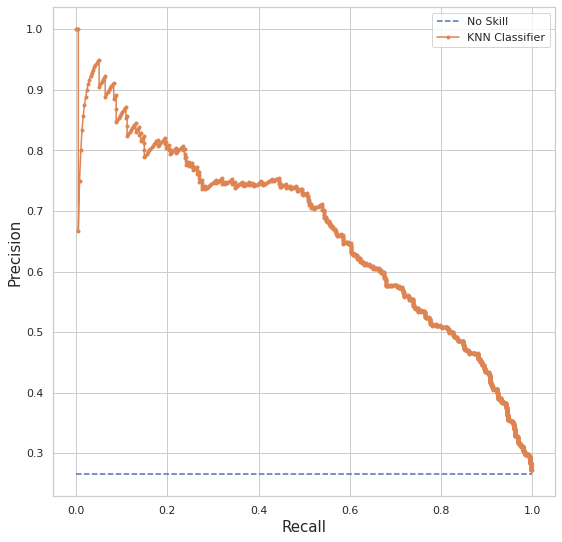

[[899 134]
 [158 216]]


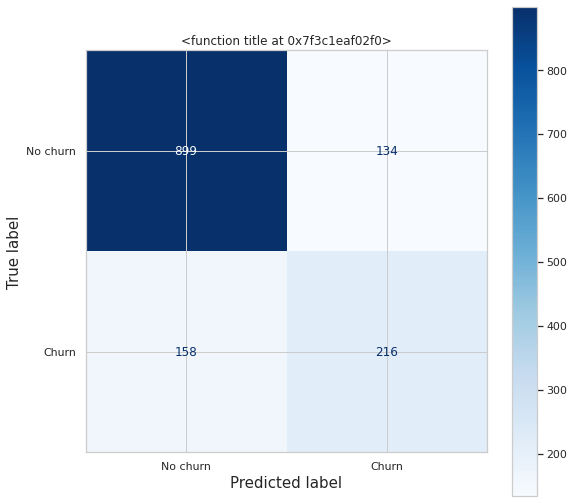

In [0]:

probs = knn_gscv.predict_proba(X_test)
yhat = knn_gscv.predict(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc_s = roc_auc_score(Y_test, probs)
# summarize scores
print('KNN: ROC AUC=%.3f' % (auc_s))
# calculate roc curves
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15



fpr, tpr, _ = roc_curve(Y_test, probs)

pyplot.plot(fpr, tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15


# keep probabilities for the positive outcome only

# predict class values

knn_precision, knn_recall, _ = precision_recall_curve(Y_test, probs)
knn_f1,knn_auc = f1_score(Y_test,yhat ), auc(knn_recall, knn_precision)
# summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (knn_f1, knn_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='KNN Classifier')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



disp = plot_confusion_matrix(knn_gscv, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,normalize=None, values_format = '.0f'
                                 )
disp.ax_.set_title(title)

print(disp.confusion_matrix)

plt.show()





In [0]:
final_svm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(probability=True)) ])

tuned_parameters = [                   
                    {'classifier__kernel': ['linear'], 'classifier__C': [1, 10, 100, 1000]}]

svm_gscv = GridSearchCV(
       final_svm, tuned_parameters, scoring='recall',cv=5
    )

svm_gscv.fit(X_train,Y_train)

print(svm_gscv.best_params_)

Y_pred4 = svm_gscv.predict(X_test)
Y_pred4_=svm_gscv.predict(X_train)

print('Misclassified samples for SVM: %d' %(Y_test != Y_pred4).sum())
print('Accuracy for SVM in test data: %.2f' % accuracy_score(Y_test,Y_pred4))
print('Accuracy for SVM in training data: %.2f' % accuracy_score(Y_train,Y_pred4_))

print(classification_report(Y_test, Y_pred4))




SVM: ROC AUC=0.827


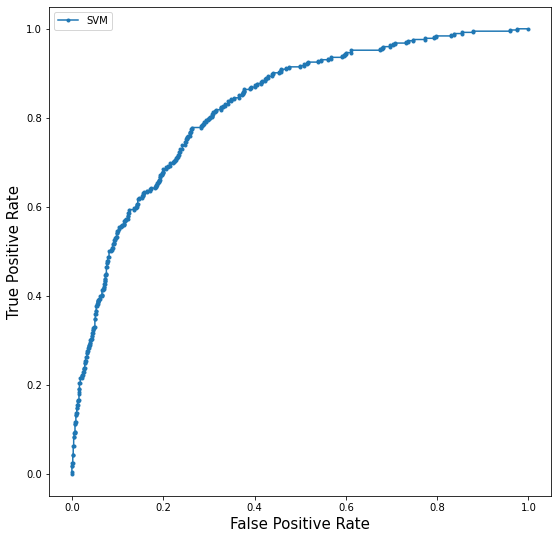

SVM: f1=0.600 auc=0.642


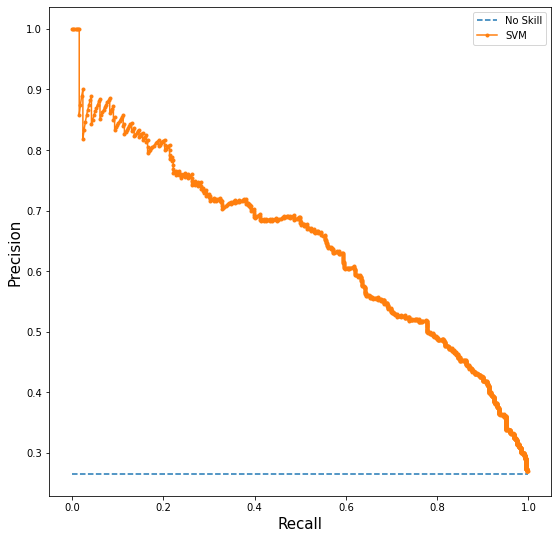

[[919 114]
 [165 209]]


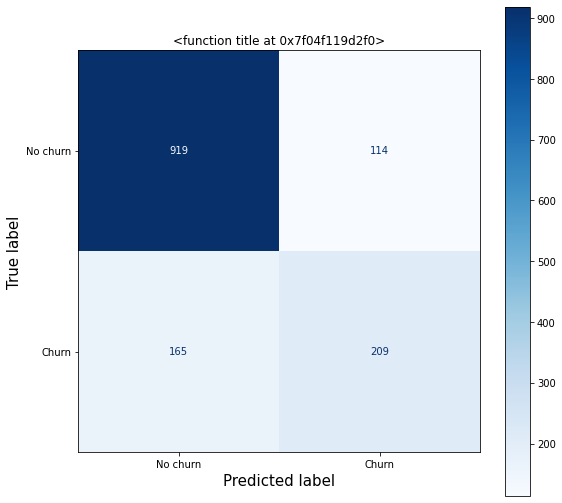

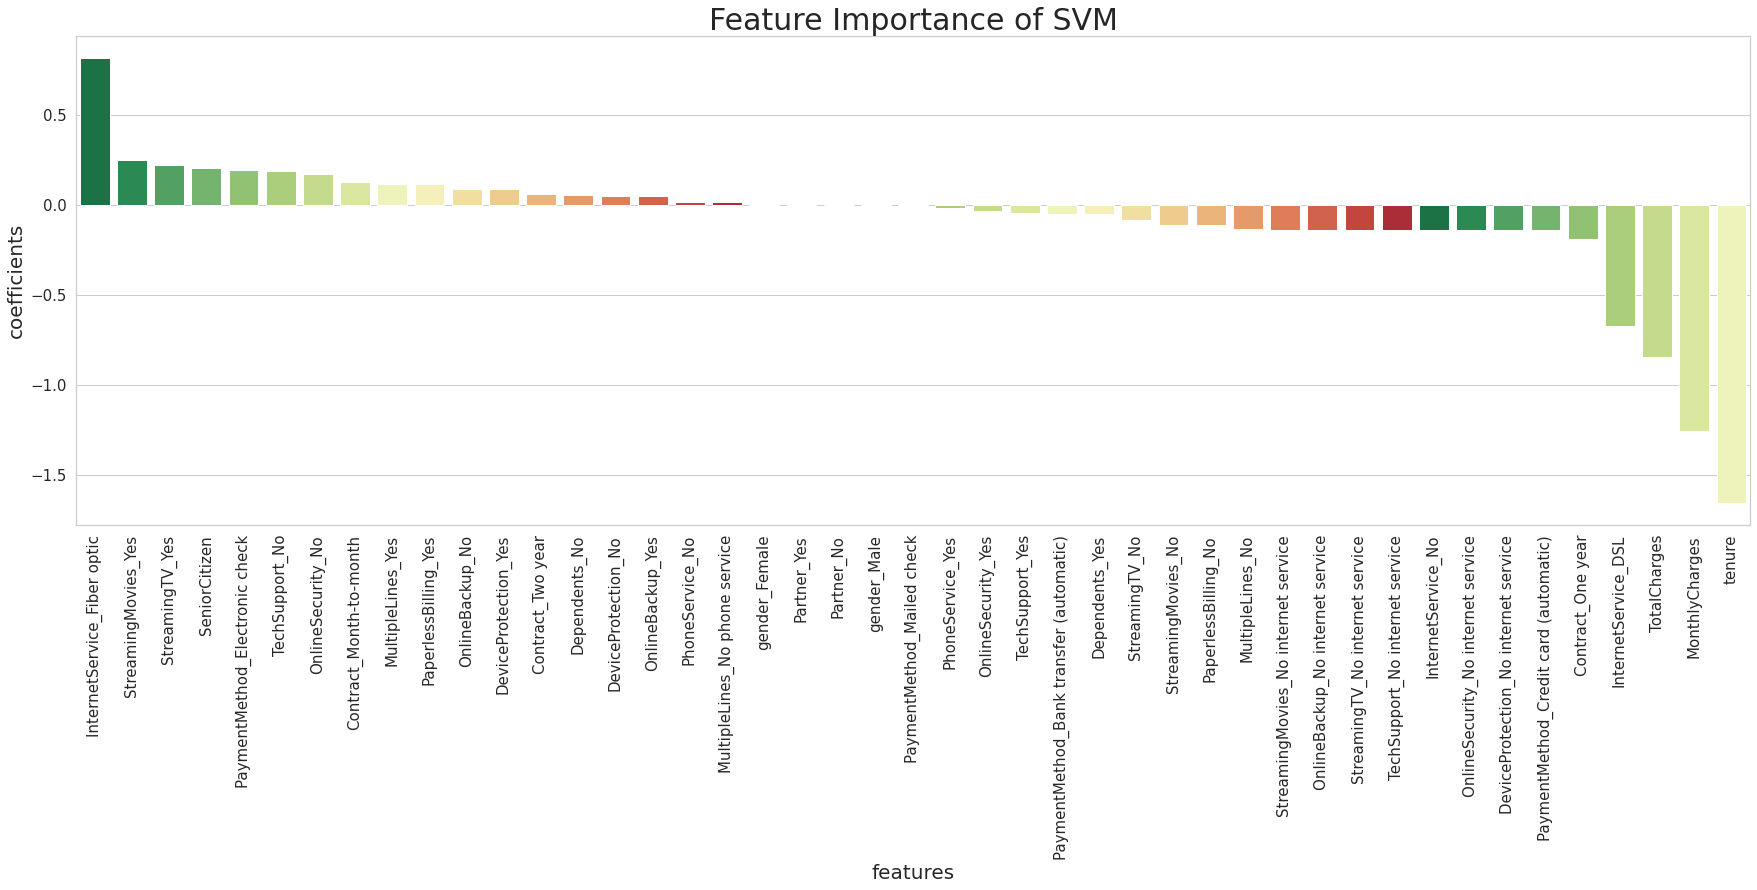

In [0]:
class_names=['No churn','Churn']



probs = svm_gscv.predict_proba(X_test)
yhat = svm_gscv.predict(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc_s = roc_auc_score(Y_test, probs)
# summarize scores
print('SVM: ROC AUC=%.3f' % (auc_s))
# calculate roc curves
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15



fpr, tpr, _ = roc_curve(Y_test, probs)

pyplot.plot(fpr, tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15


# keep probabilities for the positive outcome only

# predict class values

svm_gscv_precision, svm_gscv_recall, _ = precision_recall_curve(Y_test, probs)
svm_gscv_f1, svm_gscv_auc = f1_score(Y_test,yhat ), auc(svm_gscv_recall, svm_gscv_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (svm_gscv_f1, svm_gscv_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svm_gscv_recall, svm_gscv_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



disp = plot_confusion_matrix(svm_gscv, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,normalize=None, values_format = '.0f'
                                 )
disp.ax_.set_title(title)

print(disp.confusion_matrix)

plt.show()

coefficients  = pd.DataFrame(svm_gscv.best_estimator_.named_steps["classifier"].coef_.ravel())
column_df1     = pd.DataFrame(svm_gscv.best_estimator_.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features))
column_df2     = pd.DataFrame(list(numeric_features))

frames = [column_df2,column_df1]

column_df = pd.concat(frames).reset_index(drop=True)



coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)



%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 9]
plt.rcParams["axes.labelsize"] = 15
import seaborn as sns

sns.set(style="whitegrid")

#Total_sales = df.groupby(['Company'])['Unit Sales'].sum().sort_values(ascending=False).reset_index()

ax = sns.barplot(x="features", y="coefficients", data=coef_sumry,palette=sns.color_palette("RdYlGn_r", 18))

plt.xlabel('features', fontsize=20)
plt.ylabel('coefficients', fontsize=20)
plt.xticks(rotation=90)

ax.axes.set_title("Feature Importance of SVM",fontsize=30)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)


In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV







xgboost_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier())])

params = {
        'classifier__min_child_weight': [1, 5, 10],
        'classifier__gamma': [0.5, 1, 1.5, 2, 5],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0],
        'classifier__max_depth': [3, 4, 5]
        }



xgb_gsv = GridSearchCV(
    xgboost_pipe,
    param_grid=params, cv=5,scoring='recall'
)

xgb_gsv.fit(X_train,Y_train)


print(xgb_gsv.best_params_)

Y_pred5 = xgb_gsv.predict(X_test)
Y_pred5_=xgb_gsv.predict(X_train)

print('Misclassified samples for SVM: %d' %(Y_test != Y_pred5).sum())
print('Accuracy for SVM in test data: %.2f' % accuracy_score(Y_test,Y_pred5))
print('Accuracy for SVM in training data: %.2f' % accuracy_score(Y_train,Y_pred5_))

print(classification_report(Y_test, Y_pred5))


{'classifier__colsample_bytree': 1.0, 'classifier__gamma': 1, 'classifier__max_depth': 4, 'classifier__min_child_weight': 10, 'classifier__subsample': 0.8}
Misclassified samples for SVM: 265
Accuracy for SVM in test data: 0.81
Accuracy for SVM in training data: 0.83
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1033
           1       0.67      0.57      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.75      1407
weighted avg       0.80      0.81      0.81      1407



{'classifier__colsample_bytree': 1.0, 'classifier__gamma': 1, 'classifier__max_depth': 4, 'classifier__min_child_weight': 10, 'classifier__subsample': 0.8}
Misclassified samples for SVM: 265
Accuracy for SVM in test data: 0.81
Accuracy for SVM in training data: 0.83
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1033
           1       0.67      0.57      0.62       374

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.75      1407
weighted avg       0.80      0.81      0.81      1407



XGBoost Classifier: ROC AUC=0.843


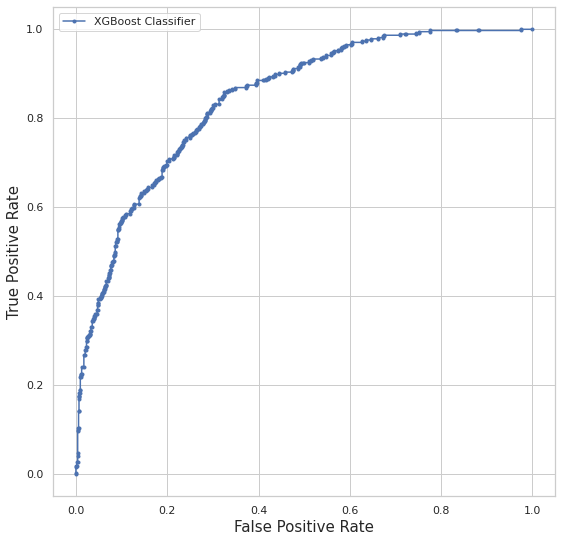

SVM: f1=0.615 auc=0.670


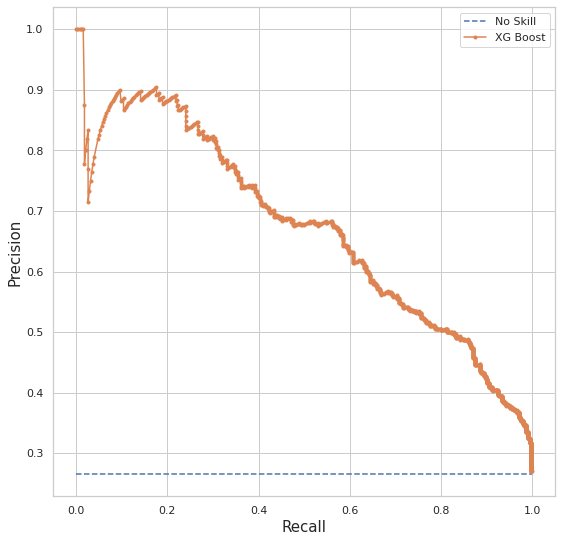

[[930 103]
 [162 212]]


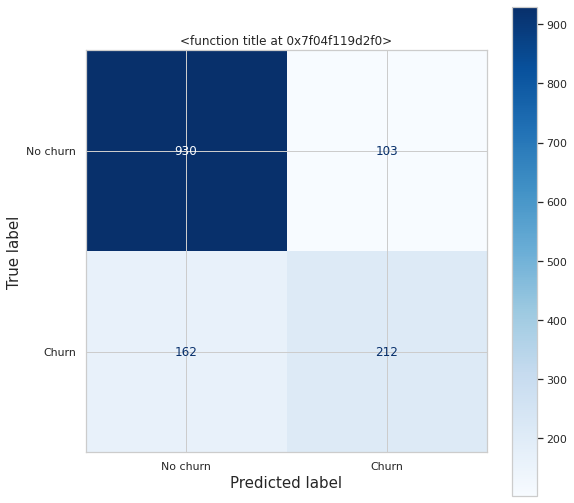

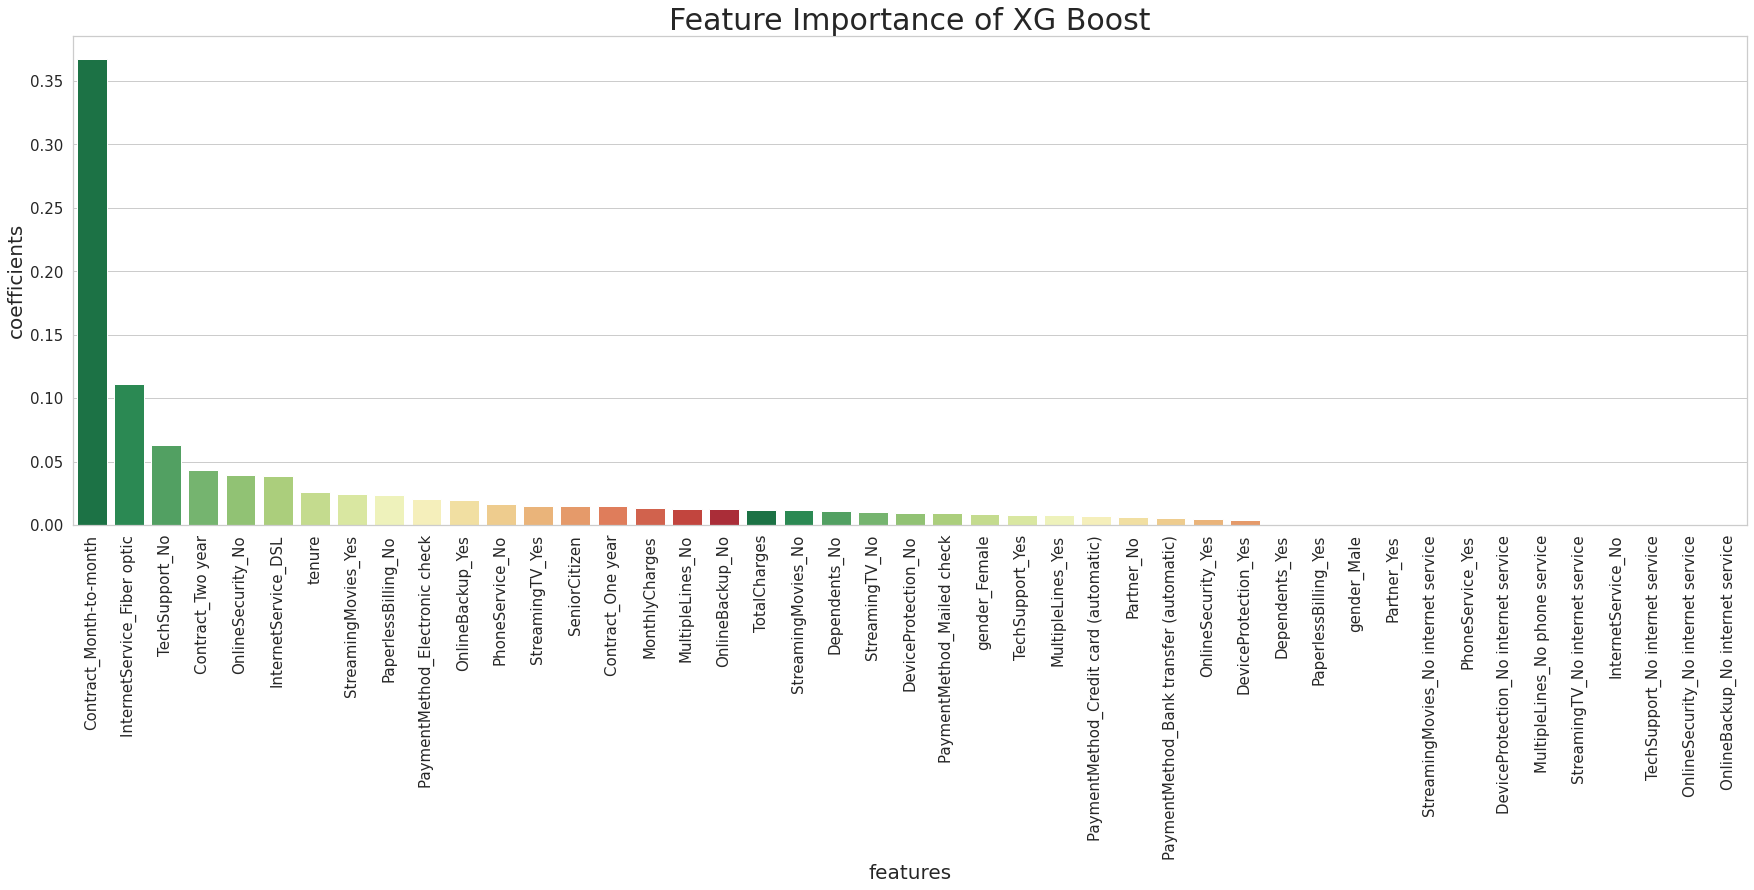

In [0]:
class_names=['No churn','Churn']



probs = xgb_gsv.predict_proba(X_test)
yhat = xgb_gsv.predict(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate scores
auc_s = roc_auc_score(Y_test, probs)
# summarize scores
print('XGBoost Classifier: ROC AUC=%.3f' % (auc_s))
# calculate roc curves
plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15



fpr, tpr, _ = roc_curve(Y_test, probs)

pyplot.plot(fpr, tpr, marker='.', label='XGBoost Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


plt.rcParams['figure.figsize'] = [9, 9]
plt.rcParams["axes.labelsize"] = 15


# keep probabilities for the positive outcome only

# predict class values

xgb_gsv_precision, xgb_gsv_recall, _ = precision_recall_curve(Y_test, probs)
xgb_gsv_f1, xgb_gsv_auc = f1_score(Y_test,yhat ), auc(xgb_gsv_recall, xgb_gsv_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (xgb_gsv_f1, xgb_gsv_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_gsv_recall, xgb_gsv_precision, marker='.', label='XG Boost')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



disp = plot_confusion_matrix(xgb_gsv, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,normalize=None, values_format = '.0f'
                                 )
disp.ax_.set_title(title)

print(disp.confusion_matrix)

plt.show()

coefficients  = pd.DataFrame(xgb_gsv.best_estimator_.named_steps["classifier"].feature_importances_)
column_df1     = pd.DataFrame(xgb_gsv.best_estimator_.named_steps['preprocessor'].transformers_[1][1]\
   .named_steps['onehot'].get_feature_names(categorical_features))
column_df2     = pd.DataFrame(list(numeric_features))

frames = [column_df2,column_df1]

column_df = pd.concat(frames).reset_index(drop=True)



coef_sumry    = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)



%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 9]
plt.rcParams["axes.labelsize"] = 15
import seaborn as sns

sns.set(style="whitegrid")

#Total_sales = df.groupby(['Company'])['Unit Sales'].sum().sort_values(ascending=False).reset_index()

ax = sns.barplot(x="features", y="coefficients", data=coef_sumry,palette=sns.color_palette("RdYlGn_r", 18))

plt.xlabel('features', fontsize=20)
plt.ylabel('coefficients', fontsize=20)
plt.xticks(rotation=90)

ax.axes.set_title("Feature Importance of XG Boost",fontsize=30)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

